In [1]:
#important libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# We get our data from Yahoo. So, our data source is yahoo
data_source='yahoo'

In [3]:
# Use datetime to set start and end datetime objects:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2022,1,1)

In [4]:
# get the data

google=web.DataReader('GOOG', data_source,start,end)

In [5]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,10.851077,10.416457,10.523555,10.840119,526815259.0,10.840119
2006-01-04,11.182087,10.952697,11.056059,11.089434,613747887.0,11.089434
2006-01-05,11.246595,10.996283,11.108363,11.238874,433952486.0,11.238874
2006-01-06,11.718576,11.288687,11.379098,11.598028,712938289.0,11.598028
2006-01-09,11.790805,11.480468,11.616708,11.628912,513593887.0,11.628912
...,...,...,...,...,...,...
2021-12-27,148.426498,147.250000,147.463501,148.063995,13256000.0,148.063995
2021-12-28,148.374496,145.935501,148.374496,146.447998,18624000.0,146.447998
2021-12-29,147.183746,145.504501,146.429504,146.504501,17022000.0,146.504501


Text(0.5, 1.0, 'google dataset')

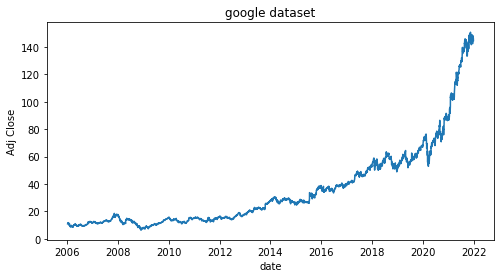

In [6]:
plt.figure(figsize=(8,4))
plt.plot(google['Adj Close'])
plt.xlabel('date')
plt.ylabel('Adj Close')
plt.title('google dataset')

# Preprocessing steps


In [7]:
#check the date objects 
google.info()  #all are float bojetcs, no need to change to timestamp object and to set as index also


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4028 entries, 2006-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4028 non-null   float64
 1   Low        4028 non-null   float64
 2   Open       4028 non-null   float64
 3   Close      4028 non-null   float64
 4   Volume     4028 non-null   float64
 5   Adj Close  4028 non-null   float64
dtypes: float64(6)
memory usage: 220.3 KB


In [8]:
#Import stastmodel packages 
import statsmodels.api as sm
import statsmodels.tsa.arima_process as arima_process
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.tsa.seasonal import _extrapolate_trend
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Building train and test set

In [9]:
#split the data into train and test 
y_hist,y_future=train_test_split(google['Adj Close'], shuffle=False)

In [10]:
print("History data\n=========")
print(y_hist.tail())
print("Future data\n==========")
print(y_future.head())

History data
Date
2017-12-26    52.837002
2017-12-27    52.468498
2017-12-28    52.407001
2017-12-29    52.320000
2018-01-02    53.250000
Name: Adj Close, dtype: float64
Future data
Date
2018-01-03    54.124001
2018-01-04    54.320000
2018-01-05    55.111500
2018-01-08    55.347000
2018-01-09    55.313000
Name: Adj Close, dtype: float64


Text(0.5, 1.0, 'Future data')

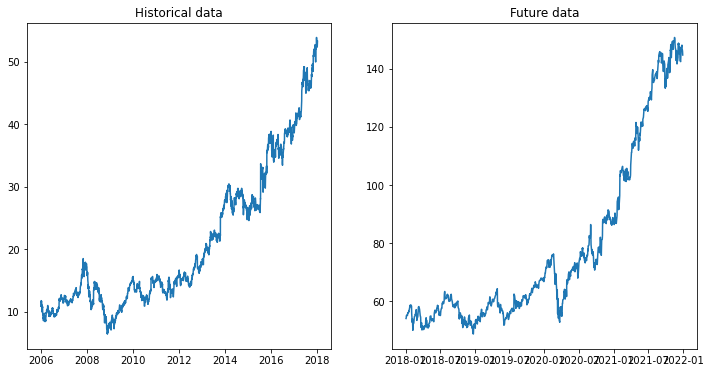

In [11]:
#plot the history and future data
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,6))
ax[0].plot(y_hist)
ax[0].set_title('Historical data')
ax[1].plot(y_future)
ax[1].set_title('Future data')

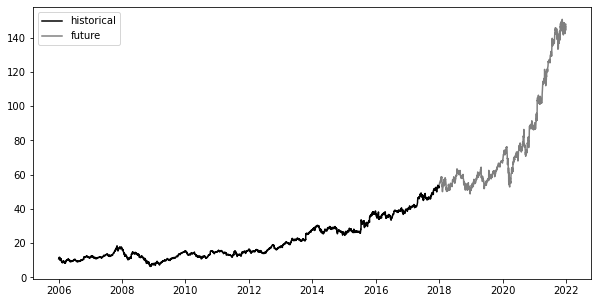

In [12]:
plt.figure(figsize=(10,5))
plt.plot(y_hist, label = 'historical', color='black')
plt.plot(y_future, label = 'future', color='black', alpha=0.5)
plt.legend();

# Applying the decompostion model

In [13]:
#first I use the stl model to decompose the data into trend,seasonal, and residue
#lets create an object
stl=STL(y_hist,period=12)
#fit the stl object
stl_results=stl.fit()

In [14]:
#trend,seasonal, and trend estimation
trend_estimation=stl_results.trend
seasonal_estimation=stl_results.seasonal
residue_estimation=stl_results.resid

<Figure size 864x432 with 0 Axes>

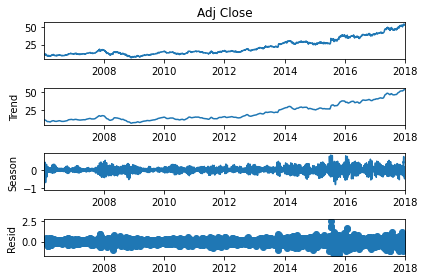

In [38]:
# plots
plt.figure(figsize=(12,6))
stl_results.plot()#trend,seasonal, and trend estimation
trend_estimation=stl_results.trend
seasonal_estimation=stl_results.seasonal
residue_estimation=stl_results.resid

Text(0.5, 1.0, 'Trend with Historical data')

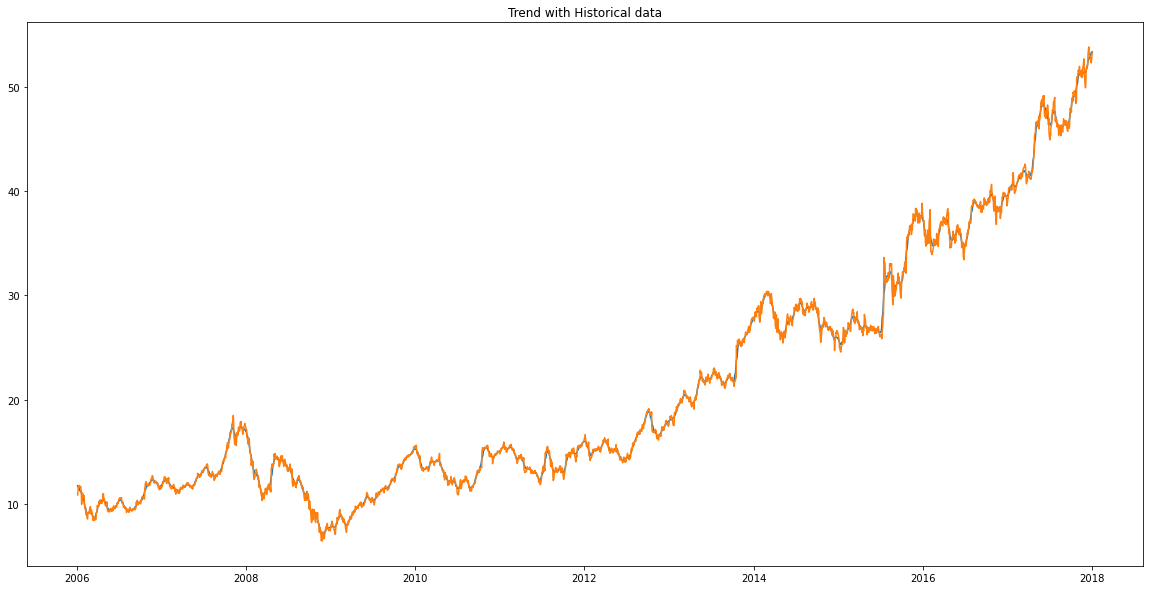

In [39]:
plt.figure(figsize=(20,10))
plt.plot(trend_estimation)
plt.plot(y_hist)
plt.title('Trend with Historical data')

In [40]:
 #additive or multiplicative models can be used to combine the seasonality 
add_season_and_trend = trend_estimation + seasonal_estimation
multi_season_and_trend =trend_estimation *seasonal_estimation

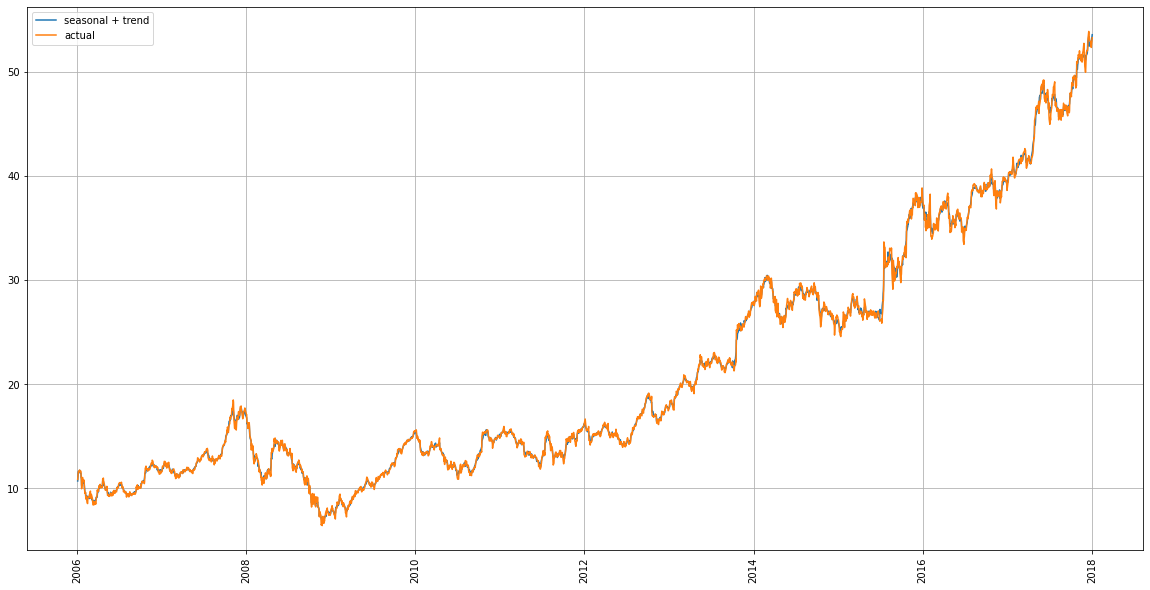

In [41]:
plt.figure(figsize=(20,10))
plt.plot(add_season_and_trend, label = 'seasonal + trend')
plt.plot(y_hist, label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

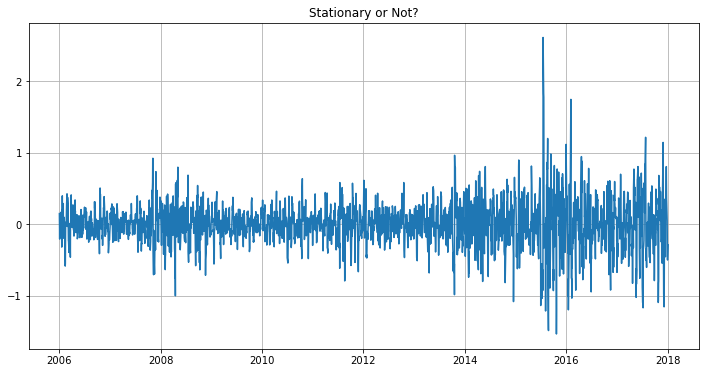

In [19]:
#plots the residue 
plt.figure(figsize=(12,6))    
plt.plot(residue_estimation)
plt.grid()
plt.title('Stationary or Not?');

# Checking stationarity based on the residue

In [25]:
residue_results = adfuller(residue_estimation)
residue_results

(-16.20204830969303,
 4.0677997312161156e-29,
 26,
 2994,
 {'1%': -3.432536010490222,
  '5%': -2.8625058378852355,
  '10%': -2.5672841410186216},
 -1743.4803495704364)

In [ ]:
auto_corr=acf(residue_estimation)
plot_acf(auto_corr)

In [ ]:
pauto_corr=pacf(residue_estimation)
plot_pacf(pauto_corr)

# Checking stationarity
to check stationarity of the data we use either adfulller or kpss packages from the statsmodels

# Adfuller

You can use the adfuller method from the statsmodels library to perform this test in Python and compare the value of the test statistics or the p-value.

If the p-value is less than or equal to 0.05 or the absolute value of the test statistics is greater than the critical value, you reject H0 and conclude that the time series is stationary.

If the p-value is greater than 0.05 or the absolute value of the test statistics is less than the critical value, you fail to reject H0 and conclude that the time series is not stationary.

In [20]:
results = adfuller(google['Adj Close'])
results

(4.326792720515861,
 1.0,
 26,
 4001,
 {'1%': -3.4319854662367453,
  '5%': -2.862262659519293,
  '10%': -2.567154679348783},
 8909.131507482594)

Conclusion: As you can see, the p-value is greater than 0.05. we fail to reject the null hypothesis and conclude that the time series is not stationary.

Alternatively, you can compare the ADF test statistics to the critical value. Since the absolute value of ADF test statistics is less than the absolute value of the critical value, you fail to reject the null hypothesis and conclude that the time series is not stationary.


# kpss

This is entirely opposite of the ADF test.

KPSS test tests the below hypothesis.

Null Hypothesis, H0: The time series is stationary.
Alternative Hypothesis, H1: The time series is not stationary.

If the p-value is less than or equal to 0.05 or the absolute value of the test statistics is greater than the critical value, you fail to reject H0 and conclude that the time series is not stationary.

If the p-value is greater than 0.05 or the absolute value of the test statistics is less than the critical value,  you reject H0 and conclude that the time series is stationary.

In [21]:
from statsmodels.tsa.stattools import kpss
result_kpss=kpss(google['Adj Close'])
result_kpss

(9.424902187858207,
 0.01,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Conclusion:Since the p value is less than 0.05 and the absolute value of test statistics is greater than the critical value, I fail to reject H0 and conclude that the time series is not stationary.



# Transforming a Non-Stationary Series into a Stationary Series

Since stationary series are easy to analyze, you can convert a non-stationary series into a stationary series by the method of Differencing. In fact, it is necessary to convert a non-stationary series into a stationary series in order to use time series forecasting models.

In [22]:
diff_yhist=y_hist.diff().dropna()
diff_yhist

Date
2006-01-04    0.249314
2006-01-05    0.149441
2006-01-06    0.359154
2006-01-09    0.030884
2006-01-10    0.071233
                ...   
2017-12-26   -0.168999
2017-12-27   -0.368504
2017-12-28   -0.061497
2017-12-29   -0.087002
2018-01-02    0.930000
Name: Adj Close, Length: 3020, dtype: float64

In [23]:
diff_results = adfuller(diff_yhist)
diff_results

(-10.50545771757241,
 1.057153386446977e-18,
 29,
 2990,
 {'1%': -3.4325389374354,
  '5%': -2.862507130612779,
  '10%': -2.5672848292524693},
 2060.6958105328795)

As you can see, the p-value is less than 0.05 and the absolute value of ADF test statistics is greater than the absolute value of the critical value, I reject the null hypothesis and conclude that the time series is stationary.

In [24]:
diff_kpss=kpss(diff_yhist)
diff_kpss

(0.45988665867949186,
 0.051341957465736277,
 29,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Here opposite to ADF, since the p-value is greater than 0.05, I reject H0 and conclude that the time series is stationary.

# compute p and q 

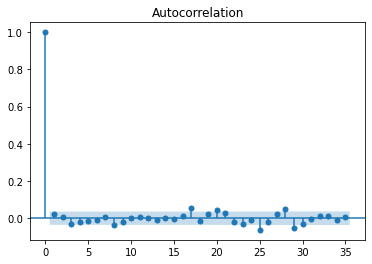

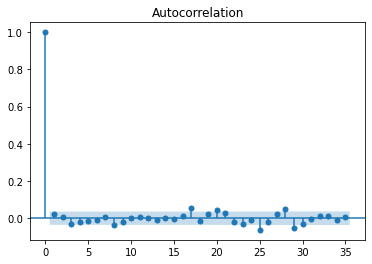

In [26]:
# q calculate from autocorrelation function
plot_acf(diff_yhist)

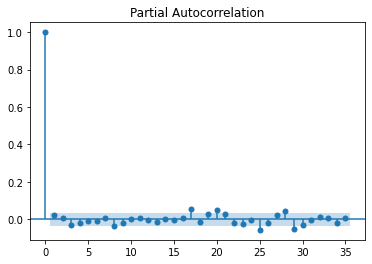

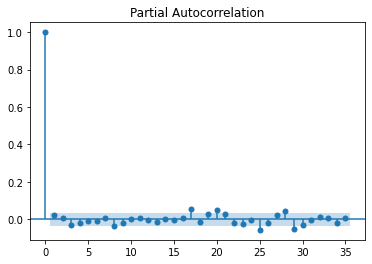

In [27]:
# p calculate from partial autocorrelation function
plot_pacf(diff_yhist)

the difference is stationary. I can apply the ARIMA model to predict

# Examining Error in Forecast

In [28]:
#Finally, I use statsmodels to forecast we will use the STLForecast object together with the ARIMA model
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(0, 1, 0), 'trend':"t"}, period=12)
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))
forecast 

3021    53.577747
3022    53.489249
3023    53.875589
3024    53.264448
3025    52.786320
          ...    
4023    66.429112
4024    66.493799
4025    66.440451
4026    66.467331
4027    66.337893
Length: 1007, dtype: float64

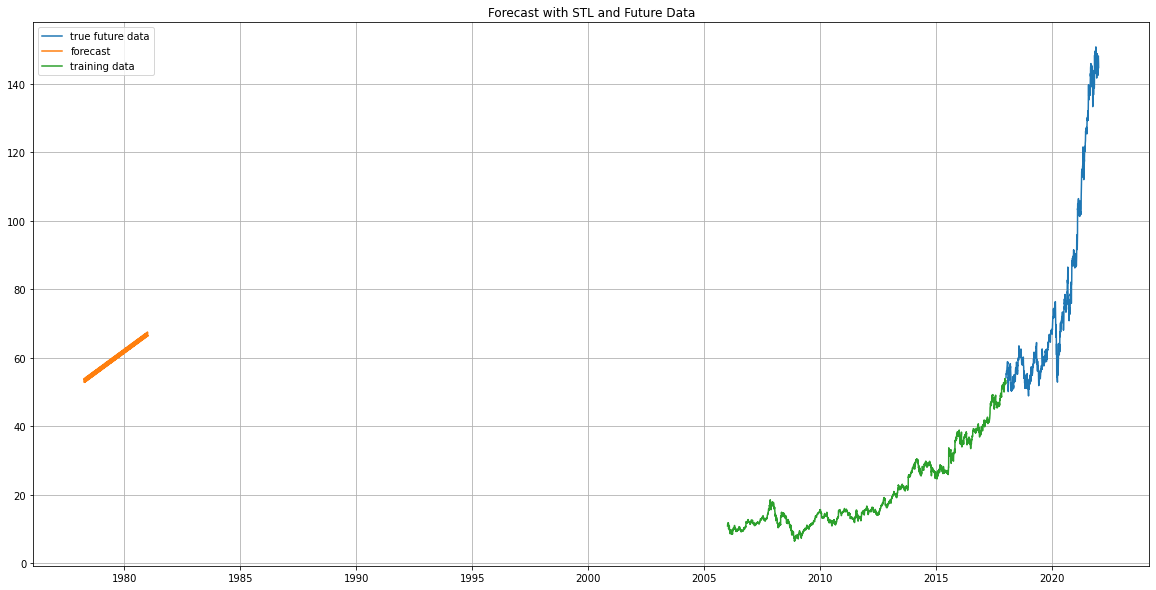

In [29]:
plt.figure(figsize=(20,10))
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist, label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [30]:
y_future.values

array([ 54.12400055,  54.31999969,  55.11149979, ..., 146.50450134,
       146.00250244, 144.67950439])

# Prediction Errors 

In [31]:
pred_error = y_future.values - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())
mae,rmse

(19.927224164648862, 32.44584782048252)

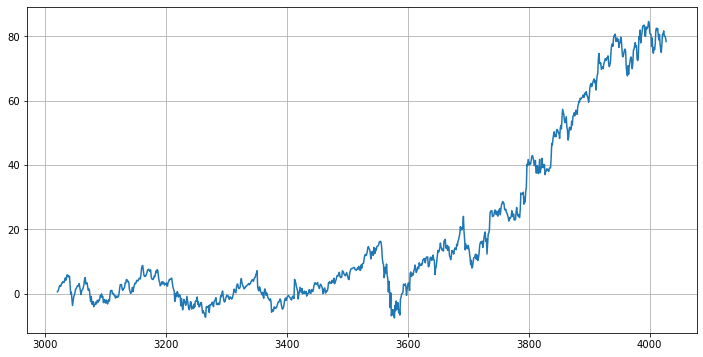

In [32]:
 #plots the Prediction Errors  
plt.figure(figsize=(12,6))    
plt.plot(pred_error)
plt.grid()

# Residual Errors

In [33]:
residue_error=y_hist-add_season_and_trend
mae = np.abs(residue_error).mean()
rmse = np.sqrt((residue_error**2).mean())
mae,rmse

(0.21787474988105704, 0.30540658285354805)

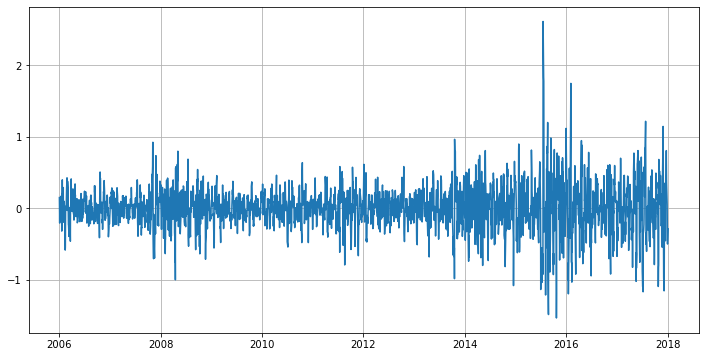

In [34]:
 #plots the residual Errors  
plt.figure(figsize=(12,6))    
plt.plot(residue_error)
plt.grid()

In [35]:
residue_error_multi=y_hist-multi_season_and_trend 
mae = np.abs(residue_error).mean()
rmse = np.sqrt((residue_error**2).mean())
mae,rmse

(0.21787474988105704, 0.30540658285354805)

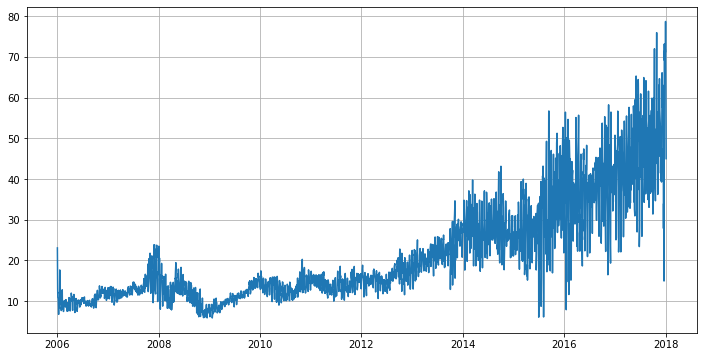

In [36]:
 #plots the residual Errors  
plt.figure(figsize=(12,6))    
plt.plot(residue_error_multi)
plt.grid()

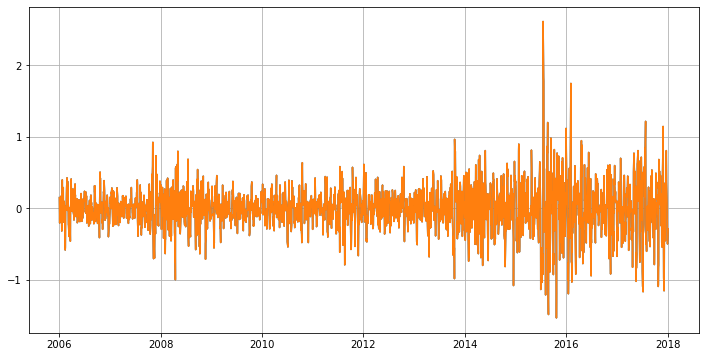

In [37]:
 #plots the residue 
plt.figure(figsize=(12,6))    
plt.plot(residue_estimation)
plt.plot(residue_error)
plt.grid()